<a href="https://colab.research.google.com/github/deena19liebert/Deep-Learning-Techniques-Lab/blob/main/McCulloch_Pitts_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Logic Gate: AND


,Input 1,Input 2,Output
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1



Logic Gate: OR


,Input 1,Input 2,Output
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1



Logic Gate: NAND


,Input 1,Input 2,Output
0,0,0,1
1,0,1,1
2,1,0,1
3,1,1,0



Logic Gate: NOR


,Input 1,Input 2,Output
0,0,0,1
1,0,1,0
2,1,0,0
3,1,1,0



Logic Gate: NOT


,Input 1,Input 2,Output
0,0,-,1
1,1,-,0


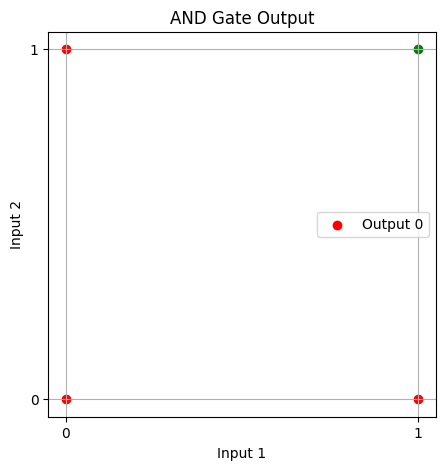

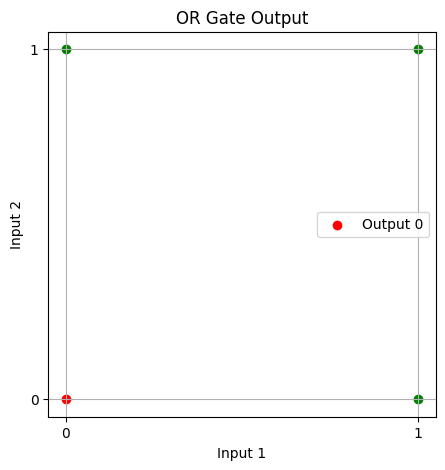

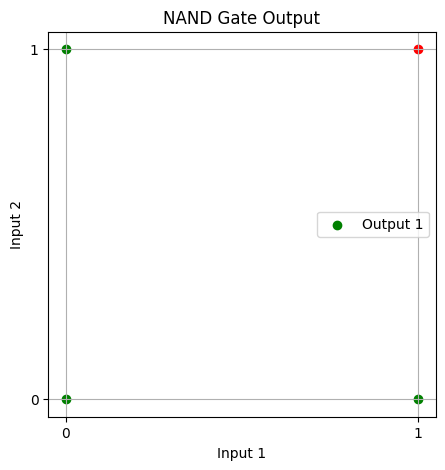

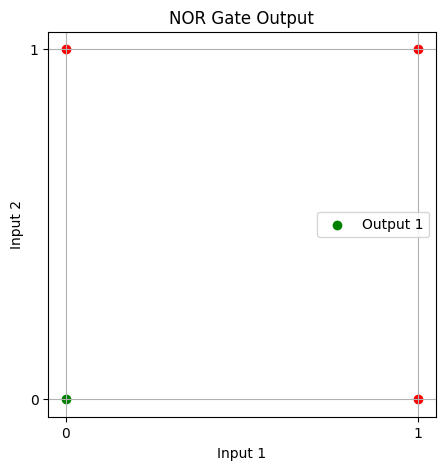

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class MCPNeuron:
    def __init__(self, weights, threshold):
        self.weights = np.array(weights)
        self.threshold = threshold

    def activate(self, x):
        return 1 if x >= self.threshold else 0

    def predict(self, inputs):
        inputs = np.array(inputs)
        net_input = np.dot(inputs, self.weights)
        output = self.activate(net_input)
        return output
def logic_gate(gate_type):
    if gate_type == "AND":
        weights = [1, 1]
        threshold = 2
    elif gate_type == "OR":
        weights = [1, 1]
        threshold = 1
    elif gate_type == "NAND":
        weights = [-1, -1]
        threshold = -1
    elif gate_type == "NOR":
        weights = [-1, -1]
        threshold = 0
    elif gate_type == "NOT":
        weights = [-1]
        threshold = 0
    else:
        raise ValueError("Unsupported logic gate type.")

    return MCPNeuron(weights, threshold)
def test_gate(gate_name):
    print(f"\nLogic Gate: {gate_name}")
    neuron = logic_gate(gate_name)
    inputs = [[0], [1]] if gate_name == "NOT" else [[0,0], [0,1], [1,0], [1,1]]

    results = []
    for inp in inputs:
        output = neuron.predict(inp)
        results.append((inp, output))

    df = pd.DataFrame({
        "Input 1": [i[0][0] for i in results],
        "Input 2": [i[0][1] if len(i[0]) > 1 else "- " for i in results],
        "Output": [i[1] for i in results]
    })
    display(df)

for gate in ["AND", "OR", "NAND", "NOR", "NOT"]:
    test_gate(gate)
def plot_gate(gate_name):
    neuron = logic_gate(gate_name)
    inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
    outputs = [neuron.predict(i) for i in inputs]

    x = inputs[:,0]
    y = inputs[:,1]

    plt.figure(figsize=(5,5))
    for i in range(len(inputs)):
        if outputs[i] == 1:
            plt.scatter(x[i], y[i], color='green', label='Output 1' if i == 0 else "")
        else:
            plt.scatter(x[i], y[i], color='red', label='Output 0' if i == 0 else "")
    plt.title(f"{gate_name} Gate Output")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.xticks([0,1])
    plt.yticks([0,1])
    plt.grid(True)
    plt.legend()
    plt.show()


for gate in ["AND", "OR", "NAND", "NOR"]:
    plot_gate(gate)
